# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="Figures/logo_uni.png" width="100" height="100/1.618">
<figure>

UNIVERSITÀ DEGLI STUDI DI TRENTO  
DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA  
A.A. 2022-2023
  
*Alunni:*  
Del Dò Giacomo, 221545  
Faccin Francesca, 222028  
Rossato Sofia, 218790

-----

# **Notebook 1: Analisi della radiazione a Vicenza**

In [1]:
import os
import warnings
import datetime
import warnings
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import rc
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.graph_objects as go
import matplotlib.dates as mdates
from IPython.display import Image
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
oms_project_path = os.path.dirname(os.getcwd())

Al fine di ottenere dati relativi alla radiazione sono richiesti una serie di dati ambientali di input. Nel caso oggetto di studio si è scelto di lavorare con i valori forniti dalla stazione metereologica di Vicenza, più precisamente la stazione di "Vicenza - Sant'Agostino", reperibili dal sito [ambienteveneto](https://www.ambienteveneto.it/datiorari/datiSensOrari.php?cd=8276&an=2023). Questi riguardano la temperatura, l'umidità media dell'aria, le precipitazioni, la radiazione solare incidente e la velocità del vento a 2 metri da terra. 

Le simulazioni sono state svolte per un periodo di tempo che va dal 20 agosto 2010 fino al 15 gennaio 2011, in accordo con le simulazioni dell'infiltrazione. 

# **Input di Radiazione**

### **Skyview factor**

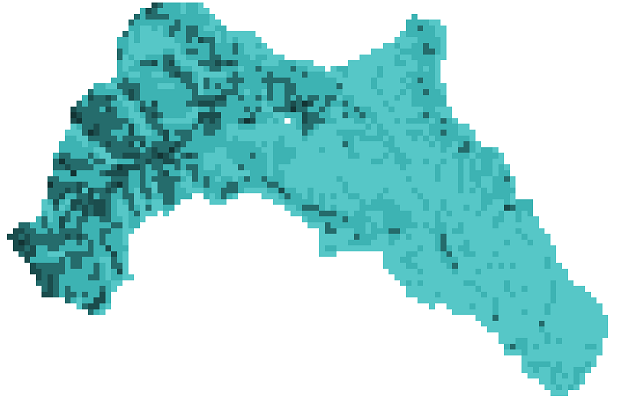

In [2]:
Image(oms_project_path+'/Images/sky.png')

### **Digital Elevation Model**

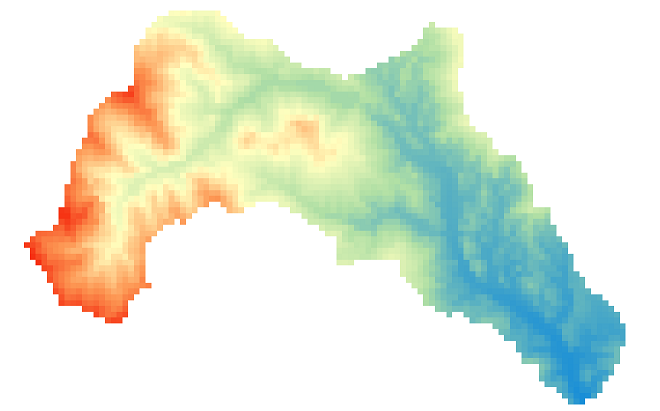

In [3]:
Image(oms_project_path+'/Images/DEM.png')

### **Temperatura dell'aria $[°C]$**

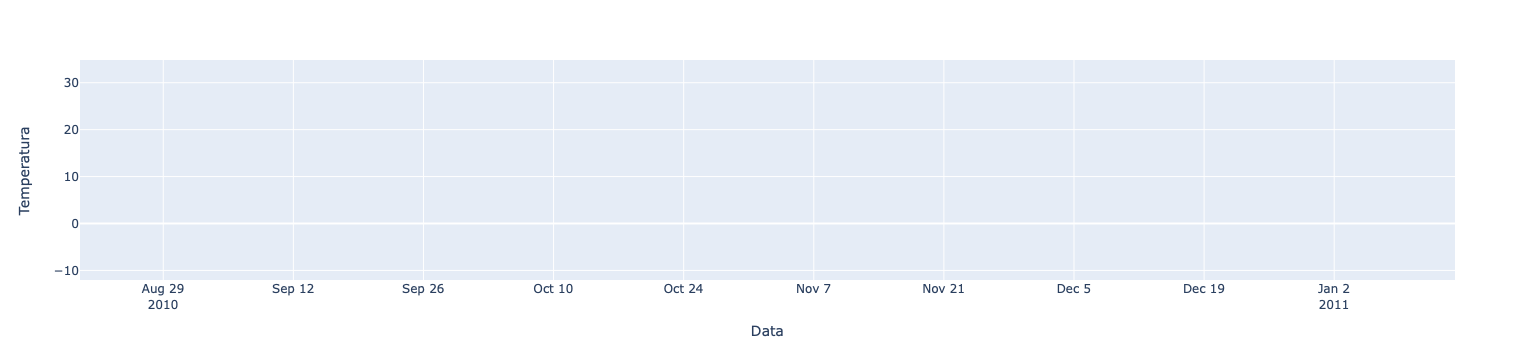

In [4]:
os.chdir(oms_project_path +'/data/Cavone/1')

df1 = pd.read_csv('airT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Temperatura']
fig = px.line(df1, x='Data', y='Temperatura')
fig.update_traces(line_color='#fc5603')
fig.show()

In [5]:
T = pd.read_csv('airT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999, usecols=[1,2])
T.columns = ['Data','Temperatura']
T.head()
T.max()

Data           2011-01-15 00:00:00
Temperatura                   32.5
dtype: object

In [6]:
T = pd.read_csv('airT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999, usecols=[1,2])
T.columns = ['Data','Temperatura']
T.head()
T.min()

Data           2010-08-20 01:00:00
Temperatura                   -9.7
dtype: object

### **Precipitazioni $[mm]$**

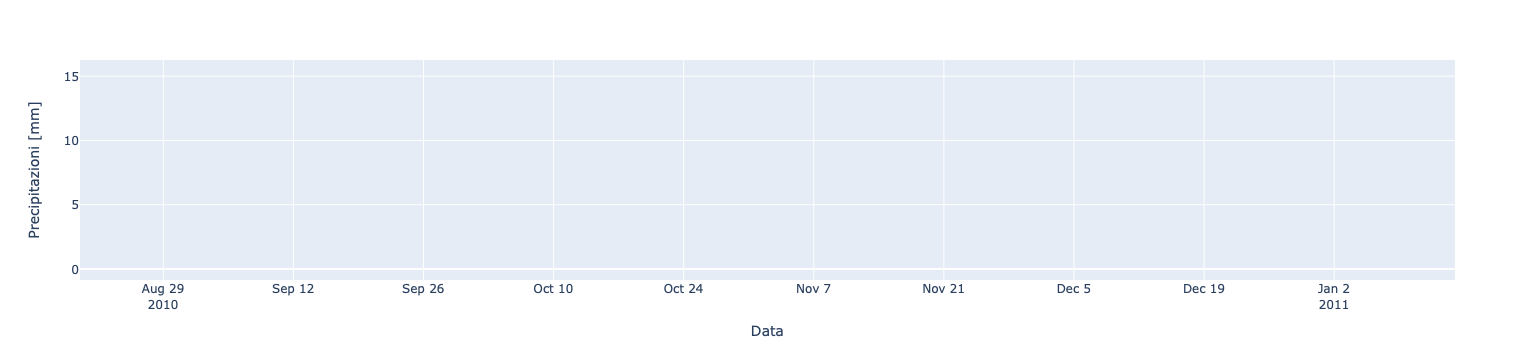

In [7]:
df1 = pd.read_csv('precip_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Precipitazioni [mm]']
fig = px.line(df1, x='Data', y='Precipitazioni [mm]')
fig.update_traces(line_color='#0367fc')
fig.show()

### **Umidità del Suolo (Soil Moisture)**

Per quanto riguarda l'umidità del suolo, data la difficoltà nel riperire valori reali, si è optato per la creazione di una serie temporale sinusoidale, con un periodo che l'arco di 5 giorni.

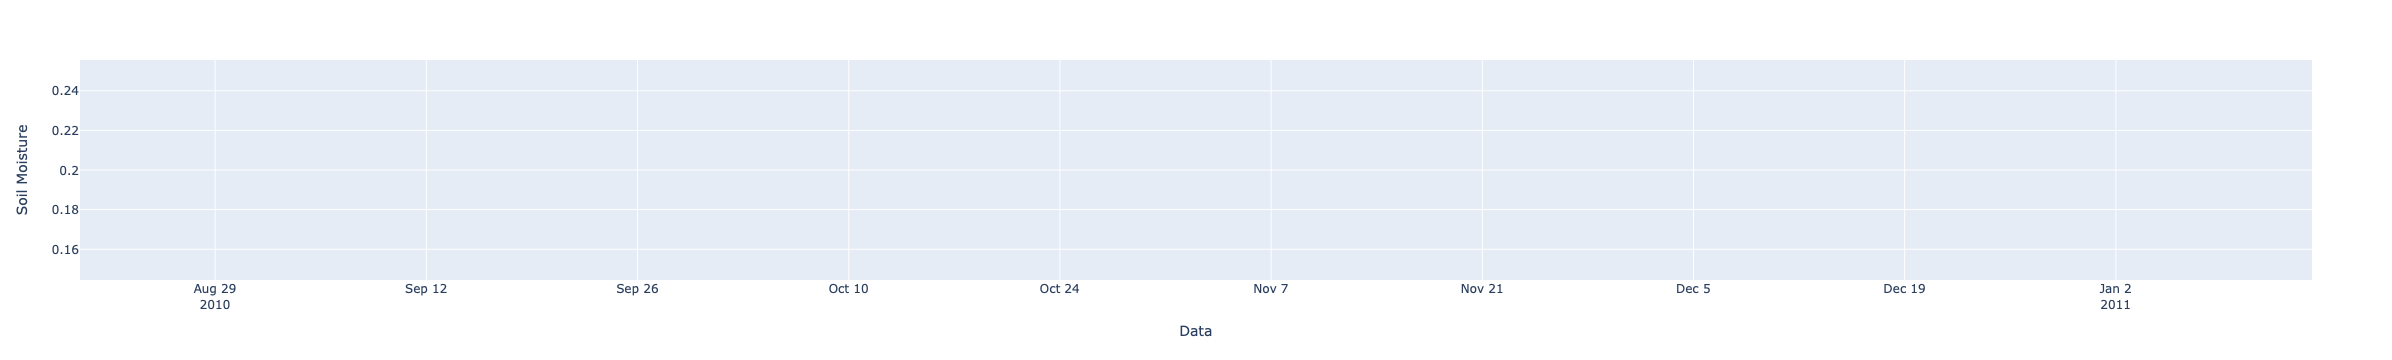

In [8]:
df1 = pd.read_csv('SoilMoisture_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Soil Moisture']
fig = px.line(df1, x='Data', y='Soil Moisture')
fig.update_traces(line_color='#018f0d')
fig.show()

# **Output di Radiazione**

## **Radiazione ad onda lunga**

La radiazione ad onda lunga (1-100 μm) viene valutata tramite l'equazione di Stefan Boltzmann in $[W / m^{2}]$. Si calcola sia la radiazione in arrivo al suolo (downwelling), che quella emessa dal terreno stesso (upwelling). Il valore dell'emissività del suolo è stato scelto pari a 0.97, mentre per il calcolo dell'emissività dell'atmosfera si è utilizzato il modello di Idso. La presenza di copertura nuvolosa viene considerata dal coefficiente $c$, detto clearness index.
Le equazioni per il calcolo delle due componenti della radiazione ad onda lunga sono:

\begin{equation}
\Large\ L_{down} = \epsilon_{all-sky} · \sigma · T_{a}^{4} \\
\Large\ L_{up}= \epsilon_{s} · \sigma · T_{s}^{4}
\end{equation}

### **Long Down Welling**

In [9]:
ID='1'

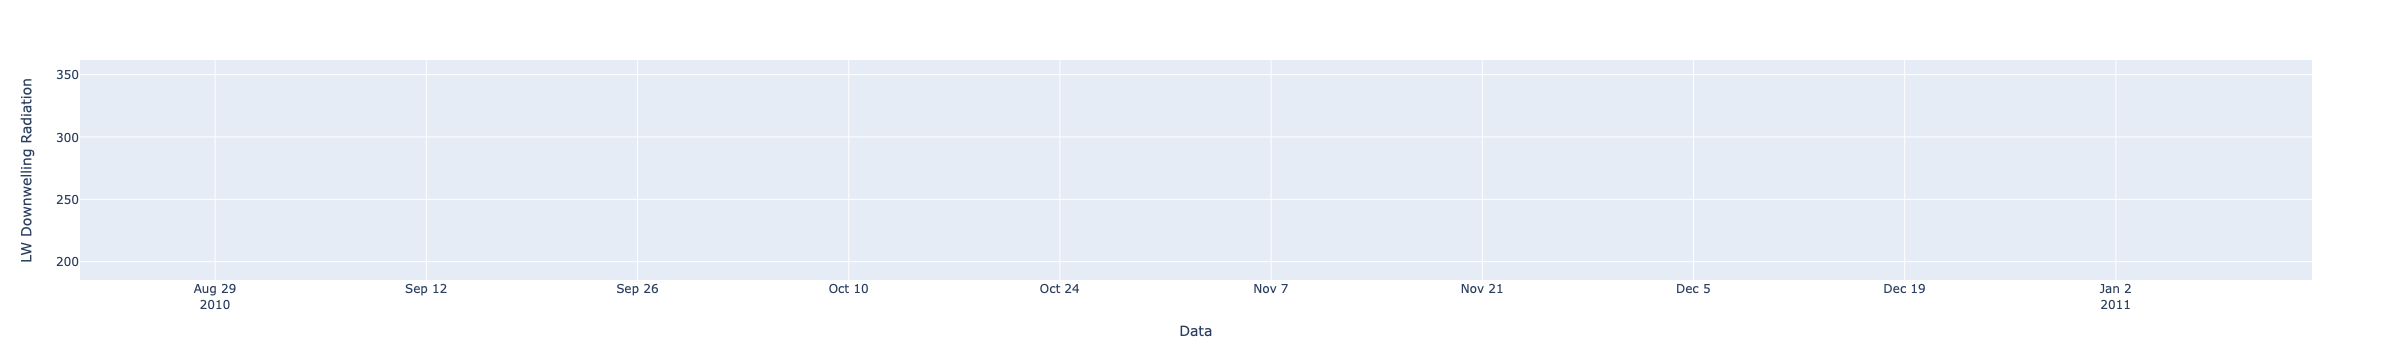

In [10]:
df1 = pd.read_csv('LongDownWelling_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','LW Downwelling Radiation']
fig = px.line(df1, x='Data', y='LW Downwelling Radiation')
fig.update_traces(line_color='#02b337')
fig.show()

### **Long Up Welling**

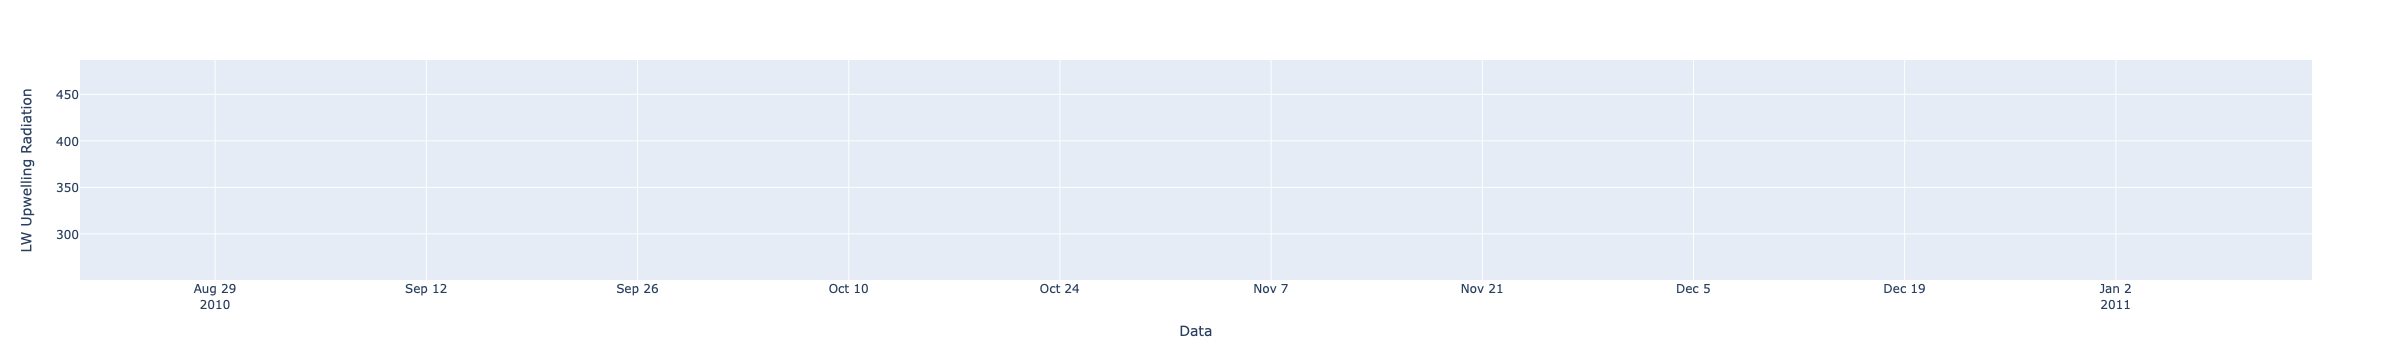

In [11]:
df1 = pd.read_csv('LongUpWelling_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','LW Upwelling Radiation']
fig = px.line(df1, x='Data', y='LW Upwelling Radiation')
fig.update_traces(line_color='#02b337')
fig.show()

## **Radiazione ad onda corta**

Per quanto riguarda la radiazione ad onda corta, vengono considerate sia la componente diretta che quella diffusa. La prima dipende dalla costante solare, dalla trasmittanza atmosferica e da vari fattori di correzione, mentre la seconda dipende dallo sky view factor e dalle componenti che causano le riflessioni.

### **Shortwave Radiation  $[W m^{−2}]$**

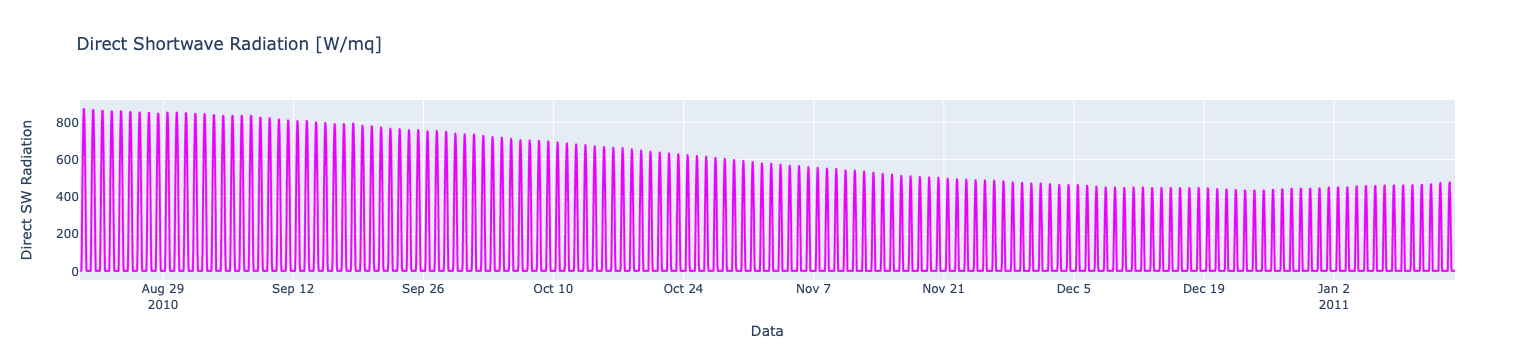

In [12]:
name_file = 'ShortwaveDirect_'+ID+'.csv'

df1 = pd.read_csv(name_file,skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Direct SW Radiation']
fig = px.line(df1, x='Data', y='Direct SW Radiation', title='Direct Shortwave Radiation [W/mq]')
fig.update_traces(line_color='#e502fa')

fig.show()

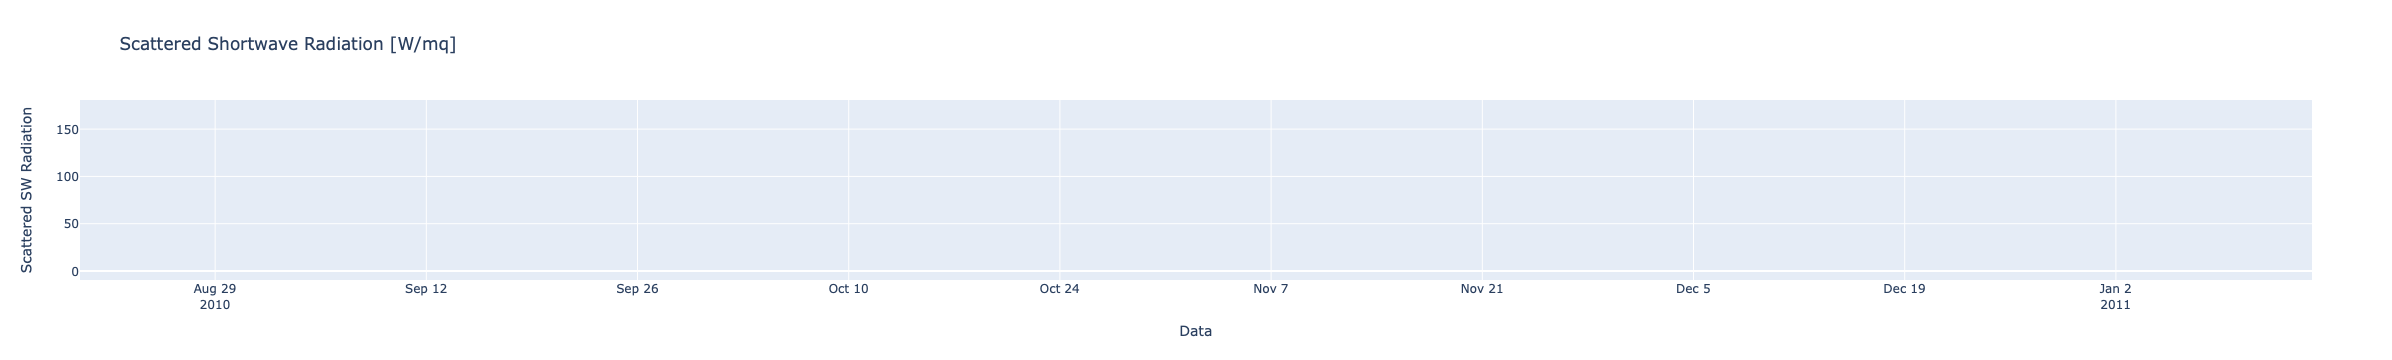

In [13]:
name2_file = 'ShortwaveDiffuse_'+ID+'.csv'

df2 = pd.read_csv(name2_file,skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Data','Scattered SW Radiation']
fig = px.line(df2, x='Data', y='Scattered SW Radiation', title='Scattered Shortwave Radiation [W/mq]')
fig.update_traces(line_color='#e502fa')

fig.show()

### **Radiazione Netta  $[W m^{−2}]$**

La radiazione netta viene calcolata come bilancio tra tutte le componenti di radiazione in gioco, dove quella ad onda longa emessa dalla Terra risulta essere l'unica in uscita. L'espressione utilizzata è la seguente:

$$\Large\ Rn=(1-\alpha)(Rs_{dir}+Rs_{dif})+Rl_d-Rl_u $$ 
dove $\alpha$ è l'albedo terrestre, posto pari a 0.26.

 - Rn: radiazione netta [$MJ \cdot m^{2} \cdot day^{−1}$]
 - $\alpha$: albedo
 - Rs: radiazione ad onda corta diretta [$MJ \cdot m^{2} \cdot day^{−1}$]
 - d: radiazione ad onda corta diffusa [$MJ \cdot m^{2} \cdot day^{−1}$]
 - Rl_d: radiazione ad onda lunga rilasciata dall'atmosfera [$MJ \cdot m^{2} \cdot day^{−1}$]
 - Rl_u: radiazione ad onda lunga rilascita dal suolo [$MJ \cdot m^{2} \cdot day^{−1}$]

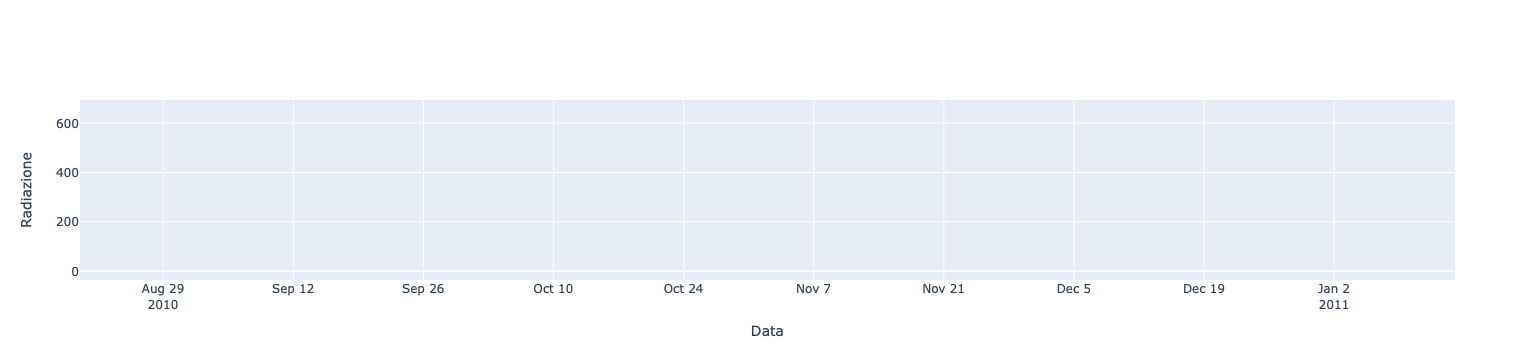

In [14]:
name_file = 'Net_'+ID+'.csv'

df1 = pd.read_csv(name_file,skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Radiazione']
fig = px.line(df1, x='Data', y='Radiazione', title='$Net\ Radiation \\ [W m^{−2}]$')
fig.update_traces(line_color='#024dfa')

fig.show()

### **Radiazione con il Clearness Index $[W m^{−2}]$**

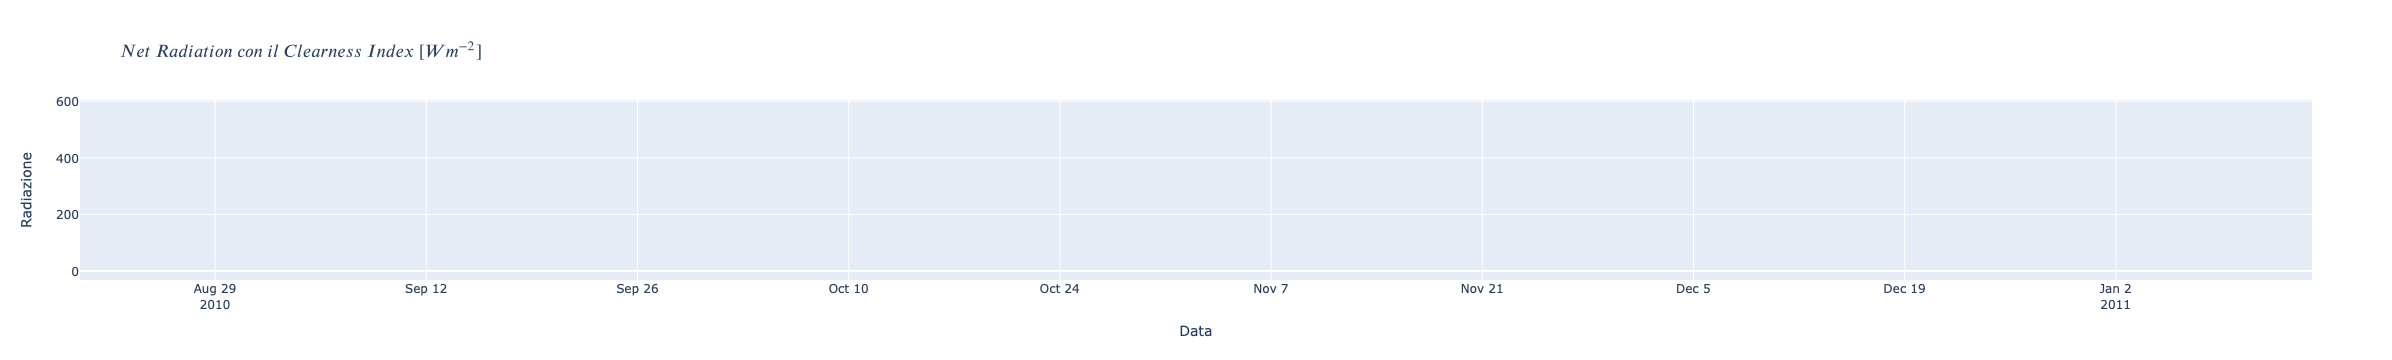

In [15]:
name_file = 'Net_allsky_'+ID+'.csv'

df1 = pd.read_csv(name_file,skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Data','Radiazione']
fig = px.line(df1, x='Data', y='Radiazione', title='$Net \ Radiation \ con \ il \ Clearness \ Index \ [W m^{−2}]$')
fig.update_traces(line_color='#024dfa')

fig.show()

### **Compare Radiation with Clearness Index  $[W m^{−2}]$**

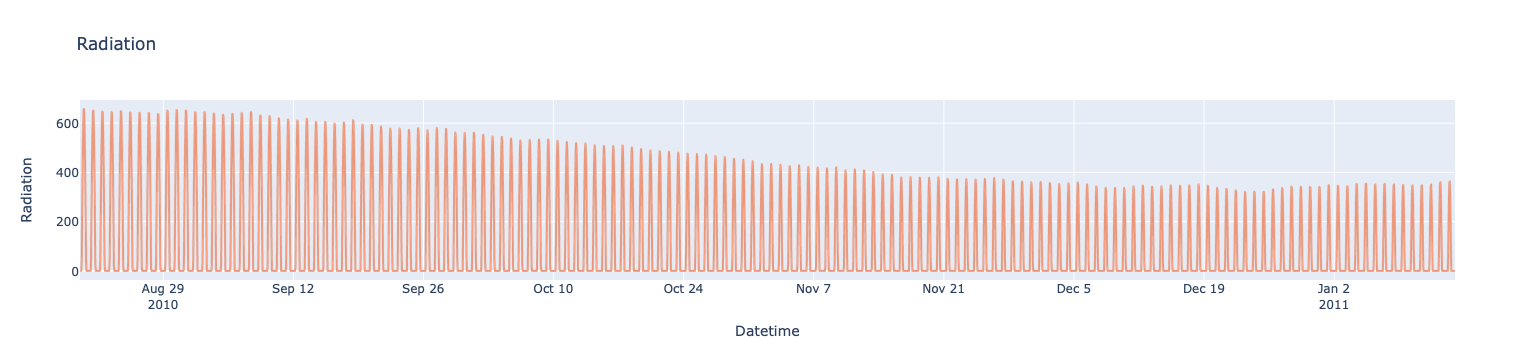

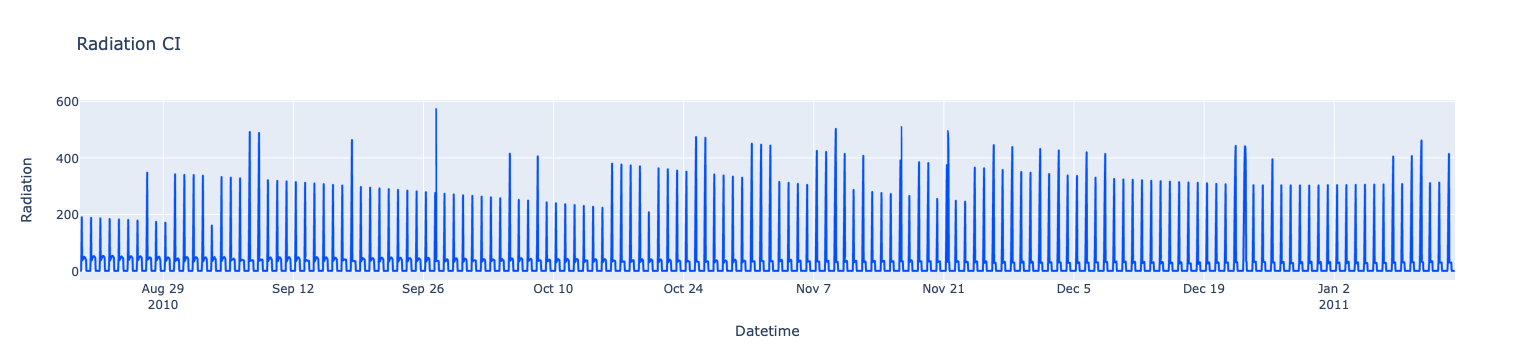

In [16]:
df = pd.read_csv('Net_'+ID+'.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','Radiation']
fig = px.line(df, x='Datetime', y='Radiation', title='Radiation')
fig.update_traces(line_color='darksalmon')

fig.show()

df2 = pd.read_csv('Net_allsky_'+ID+'.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','Radiation']
fig = px.line(df2, x='Datetime', y='Radiation', title='Radiation CI')
fig.update_traces(line_color='#024dfa')

fig.show()

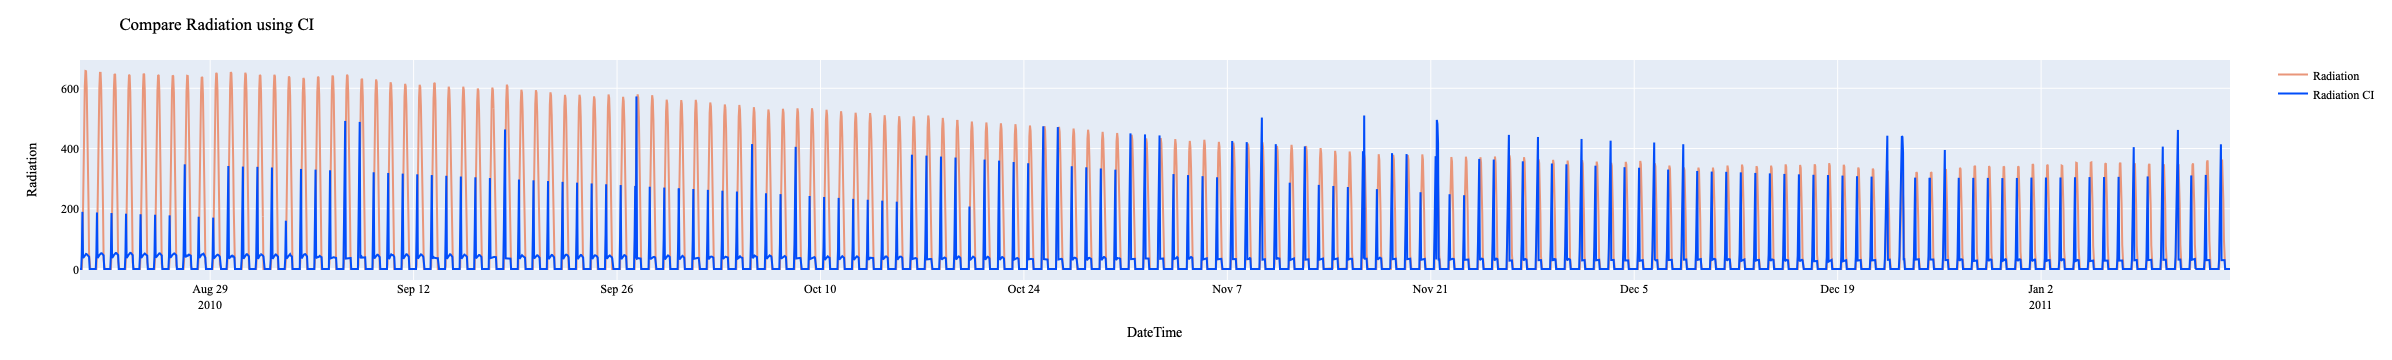

In [17]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Radiation'], mode='lines', name='Radiation', line_color='darksalmon'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['Radiation'], mode='lines', name='Radiation CI', line_color='#024dfa'))

fig.update_layout(
    title='Compare Radiation using CI ',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="Radiation",
    #legend_title="Date",
    font=dict(size=12))
fig.show()